In [262]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d

In [263]:
%matplotlib notebook

In [264]:
def flatten(u):
    Nx, Ny = np.shape(u)
    return np.reshape(u, Nx*Ny)
def unflatten(uflat, Nx, Ny):
    return np.reshape(uflat, (Nx, Ny))

In [265]:
def odefuncflat(uflat, t, params):
    Nx = params[2]
    Ny = params[3]
    u = unflatten(uflat, Nx, Ny)
    
    du=odefunc(u, t, params)
    duflat = flatten(du)
    return duflat 

In [266]:
def odefunc(u, t, params):
    
    Nx,Ny = np.shape(u)
    dux = np.zeros((Nx, Ny))
    duy = np.zeros((Nx, Ny))
    du = np.zeros((Nx, Ny))
    
    Fx = params[0]
    Fy = params[1]
    
   # Compute u at inner mesh points
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
                #This takes care of the inner part of the 2D array but does not yet account for all periodic boundry condiitons
                
                dux[i, j] = (u[i-1, j] - 2*u[i, j] + u[i+1, j])*Fx
                duy[i, j] = (u[i, j-1] - 2*u[i, j] + u[i, j+1])*Fy
            
                
                
  #compute u for top and bottom in x mesh points
    for j in range(1, Ny-1):
        duy[0, j]=(u[0, j-1] - 2*u[0, j] + u[0, j+1])*Fy
        duy[-1, j]=(u[-1, j-1] - 2*u[-1, j] + u[-1, j+1])*Fy
        
        dux[0, j]=(u[-1, j] - 2*u[0, j] + u[1, j])*Fx
        dux[-1, j]=(u[-2, j] - 2*u[-1, j] + u[0, j])*Fx
        
        #compute u for left and right in y mesh points
    for i in range(1, Nx-1):
        dux[i, 0]=(u[i-1,0] - 2*u[i, 0] + u[i+1, 0])*Fx
        dux[i, -1]=(u[i-1, -1] - 2*u[i, -1] + u[i+1, -1])*Fx
        
        duy[i, 0]=(u[i, -1] - 2*u[i, 0] + u[i, 1])*Fy
        duy[i, -1]=(u[i, -2] - 2*u[i, -1] + u[i, 0])*Fy
        
    dux[0,0]=(u[-1,0] - 2*u[0, 0] + u[1, 0])*Fx
    duy[0,0]=(u[0,-1] - 2*u[0, 0] + u[0, 1])*Fy
    
    dux[-1,0]=(u[-2,0] - 2*u[-1, 0] + u[0, 0])*Fx
    duy[-1,0]=(u[-1,-1] - 2*u[-1, 0] + u[-1, 1])*Fy
    
    dux[0,-1]=(u[-1,-1] - 2*u[0, -1] + u[1, -1])*Fx
    duy[0,-1]=(u[0,-2] - 2*u[0, -1] + u[0, 0])*Fy
    
    dux[-1,-1]=(u[-2,-1] - 2*u[-1, -1] + u[0, -1])*Fx
    duy[-1,-1]=(u[-1,-2] - 2*u[-1, -1] + u[-1, 0])*Fy

    du = dux + duy

    return du

In [267]:
L = 100
T = 1000
dT = 2

# Nx = 500
# Ny = 500

Nx = 20
Ny = 20
x = np.linspace(0, L, Nx) # mesh points in space
y = np.linspace(0, L, Ny) 
dx = x[1] - x[0]
dy = y[1] - y[0]
t = np.arange(0, T, dT) # mesh points in time
a_old = 0.00002
a = a_old*L**2

Fx = a/dx**2
Fy = a/dy**2
 
# Initialize u
u   = np.zeros((Nx, Ny))

# Check up on the sizes
print(np.shape(u))

# Add initial bump at midx,midy spike and integrate up to T
midx = int(Nx/2); 
midy = int(Ny/2); 
u[midx,midy] = 1

#print(np.shape(u))
#print(u)

#print(np.reshape(u, (1,25)))

# Bundle parameters for ODE solver
params = [Fx,Fy, Nx, Ny]; print (params)

#print(dx)
#print(Fx)

(20, 20)
[0.007219999999999999, 0.007219999999999999, 20, 20]


In [268]:
du = odefunc(u, t, params)
#print (du)
#print(u)
Nx,Ny = np.shape(u)
#print(np.shape(du))

In [269]:
uflat = flatten(u)
duflat = odefuncflat(uflat, t, params)
dutest = unflatten(duflat, Nx, Ny)
#print(dutest)

In [270]:
solflat = odeint(odefuncflat, uflat, t, args = (params,))
np.shape(solflat)

(500, 400)

In [271]:
sol1 = unflatten(solflat[0], Nx, Ny)
sollast = unflatten(solflat[-1], Nx, Ny)

<IPython.core.display.Javascript object>


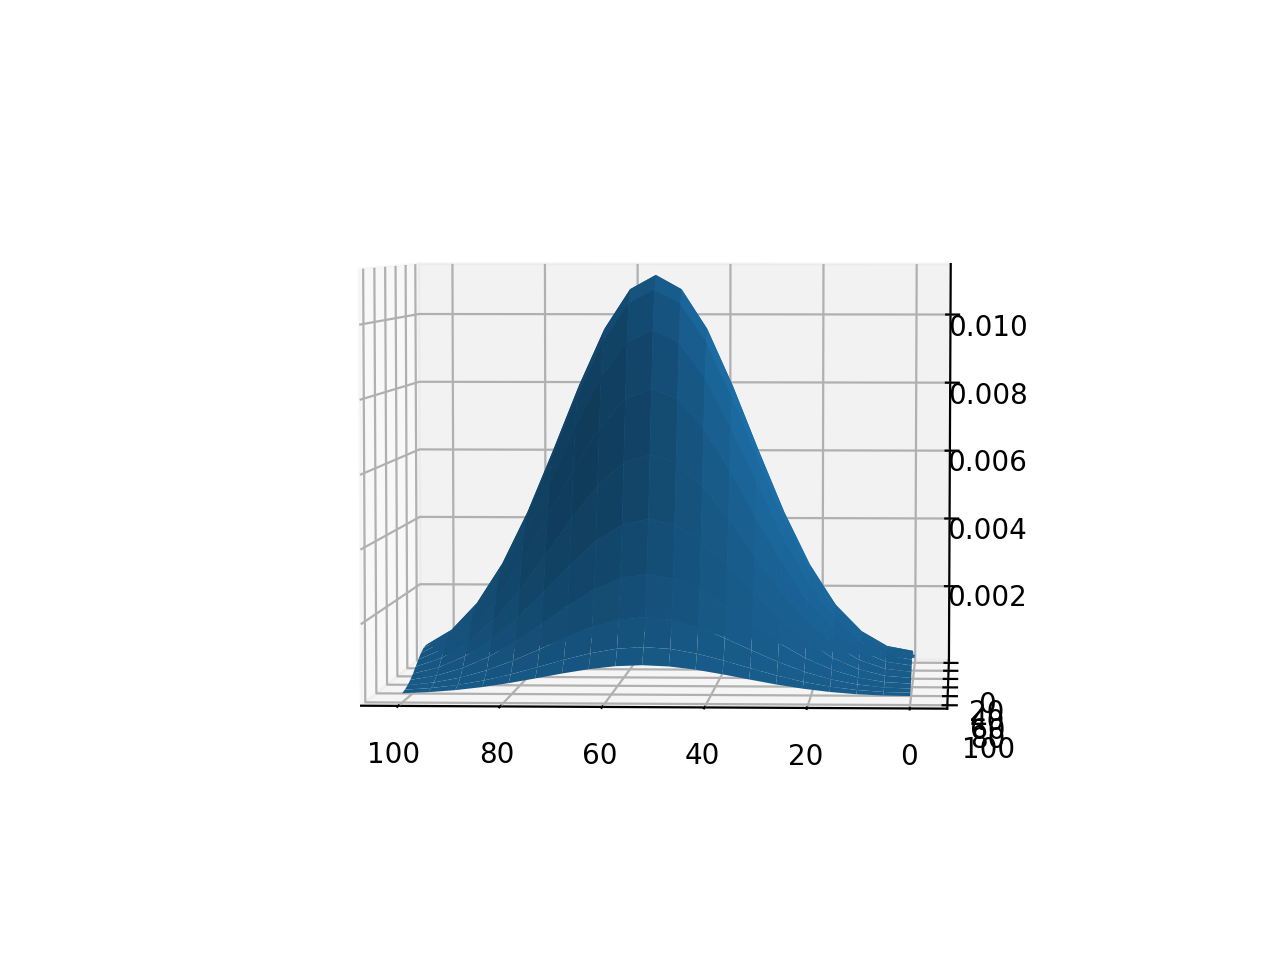

In [272]:

xgrid, ygrid = np.meshgrid(x, y)
ax = plt.figure().gca(projection='3d')
ax.plot_surface(xgrid, ygrid, sollast)

In [274]:
np.sum(sollast)

1.0